# Visualizing the log-likelihood
Author: Pierre Nugues

Data set from the original paper on logistic regression:
Joseph Berkson, Application of the Logistic Function to Bio-Assay. _Journal of the American Statistical Association_ (1944).


## Imports

In [1]:
from math import log10, sqrt, exp, log
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Dataset

In [2]:
doses = [40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300]
exposed = [462, 500, 467, 515, 561, 469, 550, 542, 479, 497, 453]
mortality = [109, 199, 298, 370, 459, 400, 495, 499, 450, 476, 442]

Berkson used the log of the dose as input

In [3]:
log_doses = [log10(doses[i]) for i in range(0, len(doses))]

In [4]:
dataset = []
for dose, deads, guinea_pigs in zip(log_doses, mortality, exposed):
    survivers = guinea_pigs - deads
    dataset += [[1, dose, 1]] * deads
    dataset += [[1, dose, 0]] * survivers
dataset = np.array(dataset)

We extract $\mathbf{X}$ and $\mathbf{y}$

In [5]:
X = dataset[:, :2]
y = dataset[:, 2]

## Observed and predicted mortality rates

Observed

In [6]:
mortality_rate = [mortality[i] / exposed[i] for i in range(0, len(doses))]

Predicted with Berkson's weights

In [7]:
def logistic(x):
    try:
        return 1 / (1 + exp(-x))
    except:
        return 0

In [8]:
berkson_weights = np.array([-10.329884, 5.659746])
for dose in log_doses:
    print(logistic(np.dot(np.array([1, dose]), berkson_weights)))

0.22052124873047899
0.4338894563263248
0.6085263344566239
0.7290104880567649
0.8081065642702773
0.8601643372767527
0.8951889169082097
0.9194120710886585
0.9366337718686847
0.9623790518998072
0.9756362419780996


## The log-lilelihood

We compute the log-likelihood of a weight vector

In [9]:
def compute_log_likelihood(X, y, w):
    """
    Computes the likelihood of a partition given the weights
    :param X: The observations
    :param y: The class
    :param w0:
    :param w1:
    :param w2:
    :return:
    """
    p_hat = list(map(logistic, np.dot(X, w)))
    likelihood = 0
    for i in range(len(p_hat)):
        try:
            if y[i] == 1:
                likelihood += log(p_hat[i])
            else:  # If in class 0, the prob. to be in this class is 1 - P
                likelihood += log(1 - p_hat[i])
        except:
            likelihood += -100
    return likelihood / X.shape[0]

In [10]:
compute_log_likelihood(X, y, berkson_weights)

-0.40810663021936744

Any other weight vector should have a lower likelihood

In [11]:
alt_weights = np.array([-100, 50.])
compute_log_likelihood(X, y, alt_weights)

-1.6972853646230504

## Likelihood surface

We plot the likelihood surface for weights around the optimal ones

In [12]:
def plot_likelihood_surf(w0_range, w1_range):
    z_axis = np.array([[0.0] * len(w1_range) for i in range(len(w0_range))])
    x_axis, y_axis = np.meshgrid(w0_range, w1_range)
    z_axis = z_axis.reshape(x_axis.shape)

    for i in range(len(w0_range)):
        for j in range(len(w1_range)):
            z_axis[j, i] = compute_log_likelihood(X, y, [w0_range[i], w1_range[j]])
    return x_axis, y_axis, z_axis

In [13]:
w0_range = np.linspace(-15, -8, 20)
w1_range = np.linspace(0, 20, 20)

In [14]:
x_axis, y_axis, z_axis = plot_likelihood_surf(w0_range, w1_range)

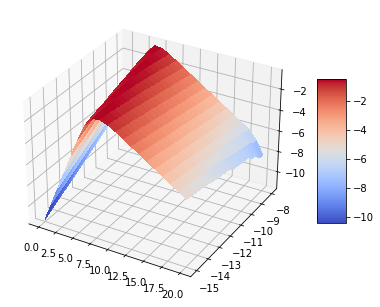

In [15]:
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.gca(projection='3d')
surf = ax.plot_surface(y_axis, x_axis, z_axis, rstride=1, cstride=1,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()